# COVID19

1.参考サイト<br>
 - [Qiita:COVID19](https://qiita.com/tags/covid-19)
 - [Prophetでコロナ陽性者予測をしよう](https://qiita.com/makaishi2/items/aa88ccdc87af3e45edd7)
 
2.準備<br>

In [1]:
# 日本語化ライブラリ導入
#!pip install japanize-matplotlib | tail -n 1

3.データの取得
-　厚生労働省のホームページ

https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv

In [1]:
# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
# matplotlib日本語化対応
import japanize_matplotlib

import datetime
# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# numpyの浮動小数点の表示精度
#np.set_printoptions(suppress=True, precision=4)

# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format

# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

# グラフのデフォルトフォント指定
#plt.rcParams["font.size"] = 14

# 乱数の種
random_seed = 123


t_delta = datetime.timedelta(hours=9)
JST = datetime.timezone(t_delta, 'JST')
now = datetime.datetime.now(JST)
d0 = now.strftime('%Y%m%d')
d1 = now.strftime('%Y%m%d_%H%M%S')
print(d0,d1)
notebook = 'COVID19'

20220328 20220328_095025


In [2]:
# 厚生労働省の公開データ
url = 'https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv'
# データ読み込み
df = pd.read_csv(url, parse_dates=[0])
#df.to_csv(f'~/datasets/{notebook}/{d0}_newly_confirmed_cases_daily.csv')
# 結果確認
#display(df.head())
display(df.tail())

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,Saitama,Chiba,Tokyo,Kanagawa,Niigata,Toyama,Ishikawa,Fukui,Yamanashi,Nagano,Gifu,Shizuoka,Aichi,Mie,Shiga,Kyoto,Osaka,Hyogo,Nara,Wakayama,Tottori,Shimane,Okayama,Hiroshima,Yamaguchi,Tokushima,Kagawa,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
796,2022-03-22,20168,885,163,109,251,108,69,229,776,312,322,1626,1147,3533,2351,249,101,97,80,72,302,313,296,940,159,180,226,998,629,190,78,77,51,172,371,153,68,159,79,90,770,221,121,239,173,88,219,326
797,2022-03-23,40945,1224,512,224,530,286,115,376,621,680,696,2114,2061,6430,2831,341,247,103,162,226,553,603,879,3158,325,588,648,4790,2104,178,156,81,78,374,697,242,114,425,318,172,1696,291,275,479,255,281,493,913
798,2022-03-24,49821,2048,574,242,699,238,170,444,933,681,605,3573,2340,8875,3742,537,325,297,161,203,478,516,1012,3224,557,685,963,4490,2325,495,198,138,77,517,920,267,124,420,265,165,2321,244,294,434,292,193,539,981
799,2022-03-25,47399,2138,675,263,441,256,175,480,1359,571,573,4145,2824,7289,3772,524,239,335,165,222,516,521,956,2719,491,636,1000,3783,2025,428,148,104,110,456,1002,257,148,318,320,149,2172,220,211,414,279,254,491,825
800,2022-03-26,47233,1701,526,247,564,288,195,420,1339,628,582,4129,2649,7440,4848,545,236,234,161,211,500,520,1050,2595,493,497,839,3645,1984,374,154,77,111,366,869,240,108,273,257,133,2277,316,256,379,283,218,597,879


In [3]:
def plotgraph():
    # グラフのデフォルトフォント指定
    plt.rcParams["font.size"] = 14


    # 時系列グラフの描画 
    import matplotlib.dates as mdates
    fig, ax = plt.subplots(figsize=(10, 5))

    #移動平均
    DAYS_MEAN = 7
    #print(df_pref.columns)
    #df_graph = pd.DataFrame()
    df_graph =df_pref.copy()
    #print(df_pref.columns)
    #print(df_graph.columns)
    df_graph['roy'] = df_pref.rolling(DAYS_MEAN).mean()

    ax.bar(df_graph['ds'], df_graph['y'])

    # グラフ描画
    ax.plot(df_graph['ds'], df_graph['roy'],color='orange')

    # 日付目盛間隔
    # 木曜日ごとに目盛りを表示
    weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
    ax.xaxis.set_major_locator(weeks)
    # 月ごとに目盛りを表示
    #months = mdates.MonthLocator()
    #ax.xaxis.set_major_locator(months)

    # 日付表記を90度回転
    ax.tick_params(axis='x', rotation=90)

    # 方眼表示など
    #ax.grid()
    ax.set_title(PREF_TITLE + 'コロナ陽性者数')
    #print(type(df_pref.iloc[-1]['ds']))
    #
    print(f'%s\n新規陽性者数 %d' % (format(df_graph.iloc[-1]['ds'],'%Y/%m/%d'),df_graph.iloc[-1]['y'] ))
    print(f'前日比 %d' % (df_graph.diff().iloc[-1]['y']) )
    print(f'%d日間平均 %d' % (DAYS_MEAN, int(df_graph.iloc[-1]['roy'])) )
    #print(f'%d日間平均 %d' % (DAYS_MEAN, int(df_pref.rolling(DAYS_MEAN).mean().iloc[-1]['y'])) )
    # 画面出力
    plt.show()
    


2022/03/26
新規陽性者数 47233
前日比 -166
7日間平均 38961


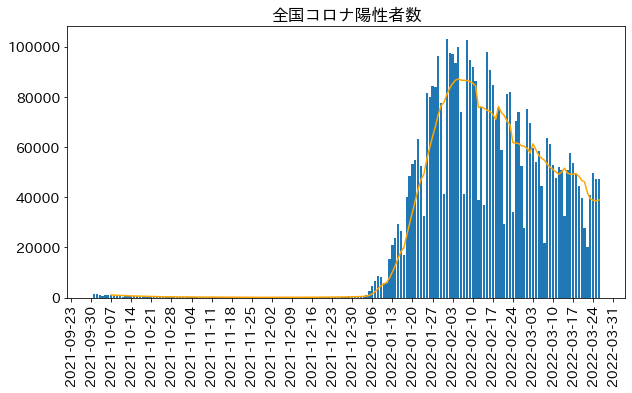

In [4]:
#PREF = 'Toyama'
#PREF_TITLE = '富山県'
PREF = 'ALL'
PREF_TITLE = '全国'
df_pref = df[['Date',PREF]]
df_pref.columns = ['ds', 'y']
df_pref = df_pref[df_pref['ds'] >= dt.datetime(2021,10,1)]

plotgraph()

2022/03/26
新規陽性者数 236
前日比 -3
7日間平均 221


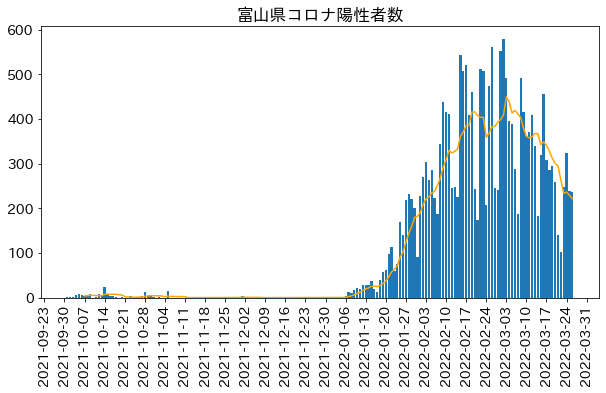

In [5]:
PREF = 'Toyama'
PREF_TITLE = '富山県'
df_pref = df[['Date',PREF]]
df_pref.columns = ['ds', 'y']
df_pref = df_pref[df_pref['ds'] >= dt.datetime(2021,10,1)]

plotgraph()

2022/03/26
新規陽性者数 234
前日比 -101
7日間平均 220


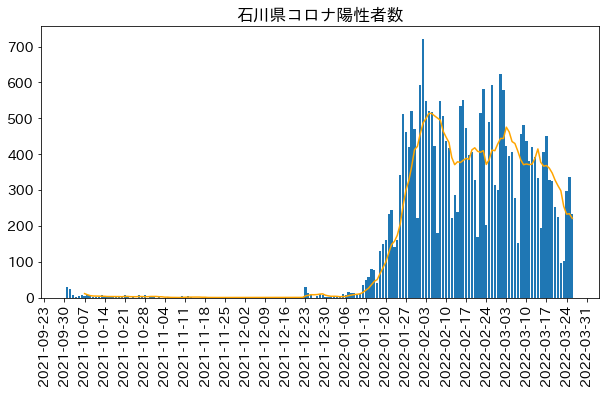

In [6]:
PREF = 'Ishikawa'
PREF_TITLE = '石川県'
df_pref = df[['Date',PREF]]
df_pref.columns = ['ds', 'y']
df_pref = df_pref[df_pref['ds'] >= dt.datetime(2021,10,1)]

plotgraph()